# ANOVA

### 1. Data Import

In [1]:
# Libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

#Get Data
df_raw_data = pd.read_csv('../04_Preparing & Storing Data/dataset_homegate_enriched.csv', sep=',', encoding='utf-8')

#Size, Number of Columns
print(df_raw_data.shape)
print(df_raw_data.dtypes)

(11302, 30)
Unnamed: 0                 int64
web-scraper-order         object
web-scraper-start-url     object
price_raw                 object
qubic_meter_raw           object
rooms_raw                 object
full_address              object
description               object
type                      object
rooms                    float64
area                       int64
price                      int64
PLZ                        int64
Street                    object
description_len          float64
luxurious                float64
furnished                float64
balcony                  float64
garden                   float64
quiet                    float64
central                  float64
price_per_m2             float64
price_cat                 object
area_cat                  object
Ortschaftsname            object
BfS_Id                     int64
Kantonskürzel             object
Kantonssteuerfuss        float64
Gemeindesteuerfuss       float64
steuersatz_kombiniert    float6

### 2. Print example data

In [2]:
# Show values for 'Kantonskürzel'
print(df_raw_data['Kantonskürzel'].value_counts())


TI    3166
VS    1815
VD    1296
AG     670
ZH     649
GE     570
FR     463
BE     393
TG     302
BL     298
SG     260
GR     254
SO     224
JU     195
NE     176
LU     175
BS      83
SZ      69
GL      42
UR      41
SH      40
ZG      40
AR      31
AI      21
NW      17
OW      12
Name: Kantonskürzel, dtype: int64


### 3. Create Pivot Table of mean price_per_m2 per Kanton

##### For Price_per_m2

In [3]:
table = pd.pivot_table(df_raw_data, 
                       values='price_per_m2',
                       columns=['Kantonskürzel'], 
                       aggfunc=np.mean)
print(table)



Kantonskürzel           AG           AI           AR           BE  \
price_per_m2   7474.842328  8258.487143  6279.188387  7287.571959   

Kantonskürzel           BL            BS           FR            GE  \
price_per_m2   8735.117752  11893.986988  6418.688121  14692.810912   

Kantonskürzel           GL            GR  ...        SH           SO  \
price_per_m2   5104.480714  11043.322323  ...  6119.461  5858.977946   

Kantonskürzel            SZ           TG           TI            UR  \
price_per_m2   11183.309855  7071.784702  7056.931364  10706.400488   

Kantonskürzel           VD           VS          ZG            ZH  
price_per_m2   10069.50564  7386.015361  15235.4275  10603.563867  

[1 rows x 26 columns]


### 4. Create grouped boxplot (groups=Kantonskürzel, values=price_per_m2)

In [4]:
#Preparation
#Extract three of the lowest priced cantons and three of the highest priced cantons.
df_aggregatedMeans = df_raw_data.groupby('Kantonskürzel').agg('mean')

df_largest = df_aggregatedMeans.nlargest(3,['price_per_m2'])
df_smallest = df_aggregatedMeans.nsmallest(3,['price_per_m2'])

print("List of the highest priced cantons: ",df_largest.index.tolist())
print("List of the lowest priced cantons: ",df_smallest.index.tolist())



List of the highest priced cantons:  ['ZG', 'GE', 'BS']
List of the lowest priced cantons:  ['JU', 'GL', 'SO']


C:\Users\maxwo\AppData\Local\Temp\ipykernel_12672\3660537895.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_aggregatedMeans = df_raw_data.groupby('Kantonskürzel').agg('mean')


##### 4.1 Boxplot for price_per_m2 without Outliers

C:\Users\maxwo\AppData\Local\Temp\ipykernel_12672\3127830947.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sorted = df_raw_data.groupby('Kantonskürzel').agg('mean')


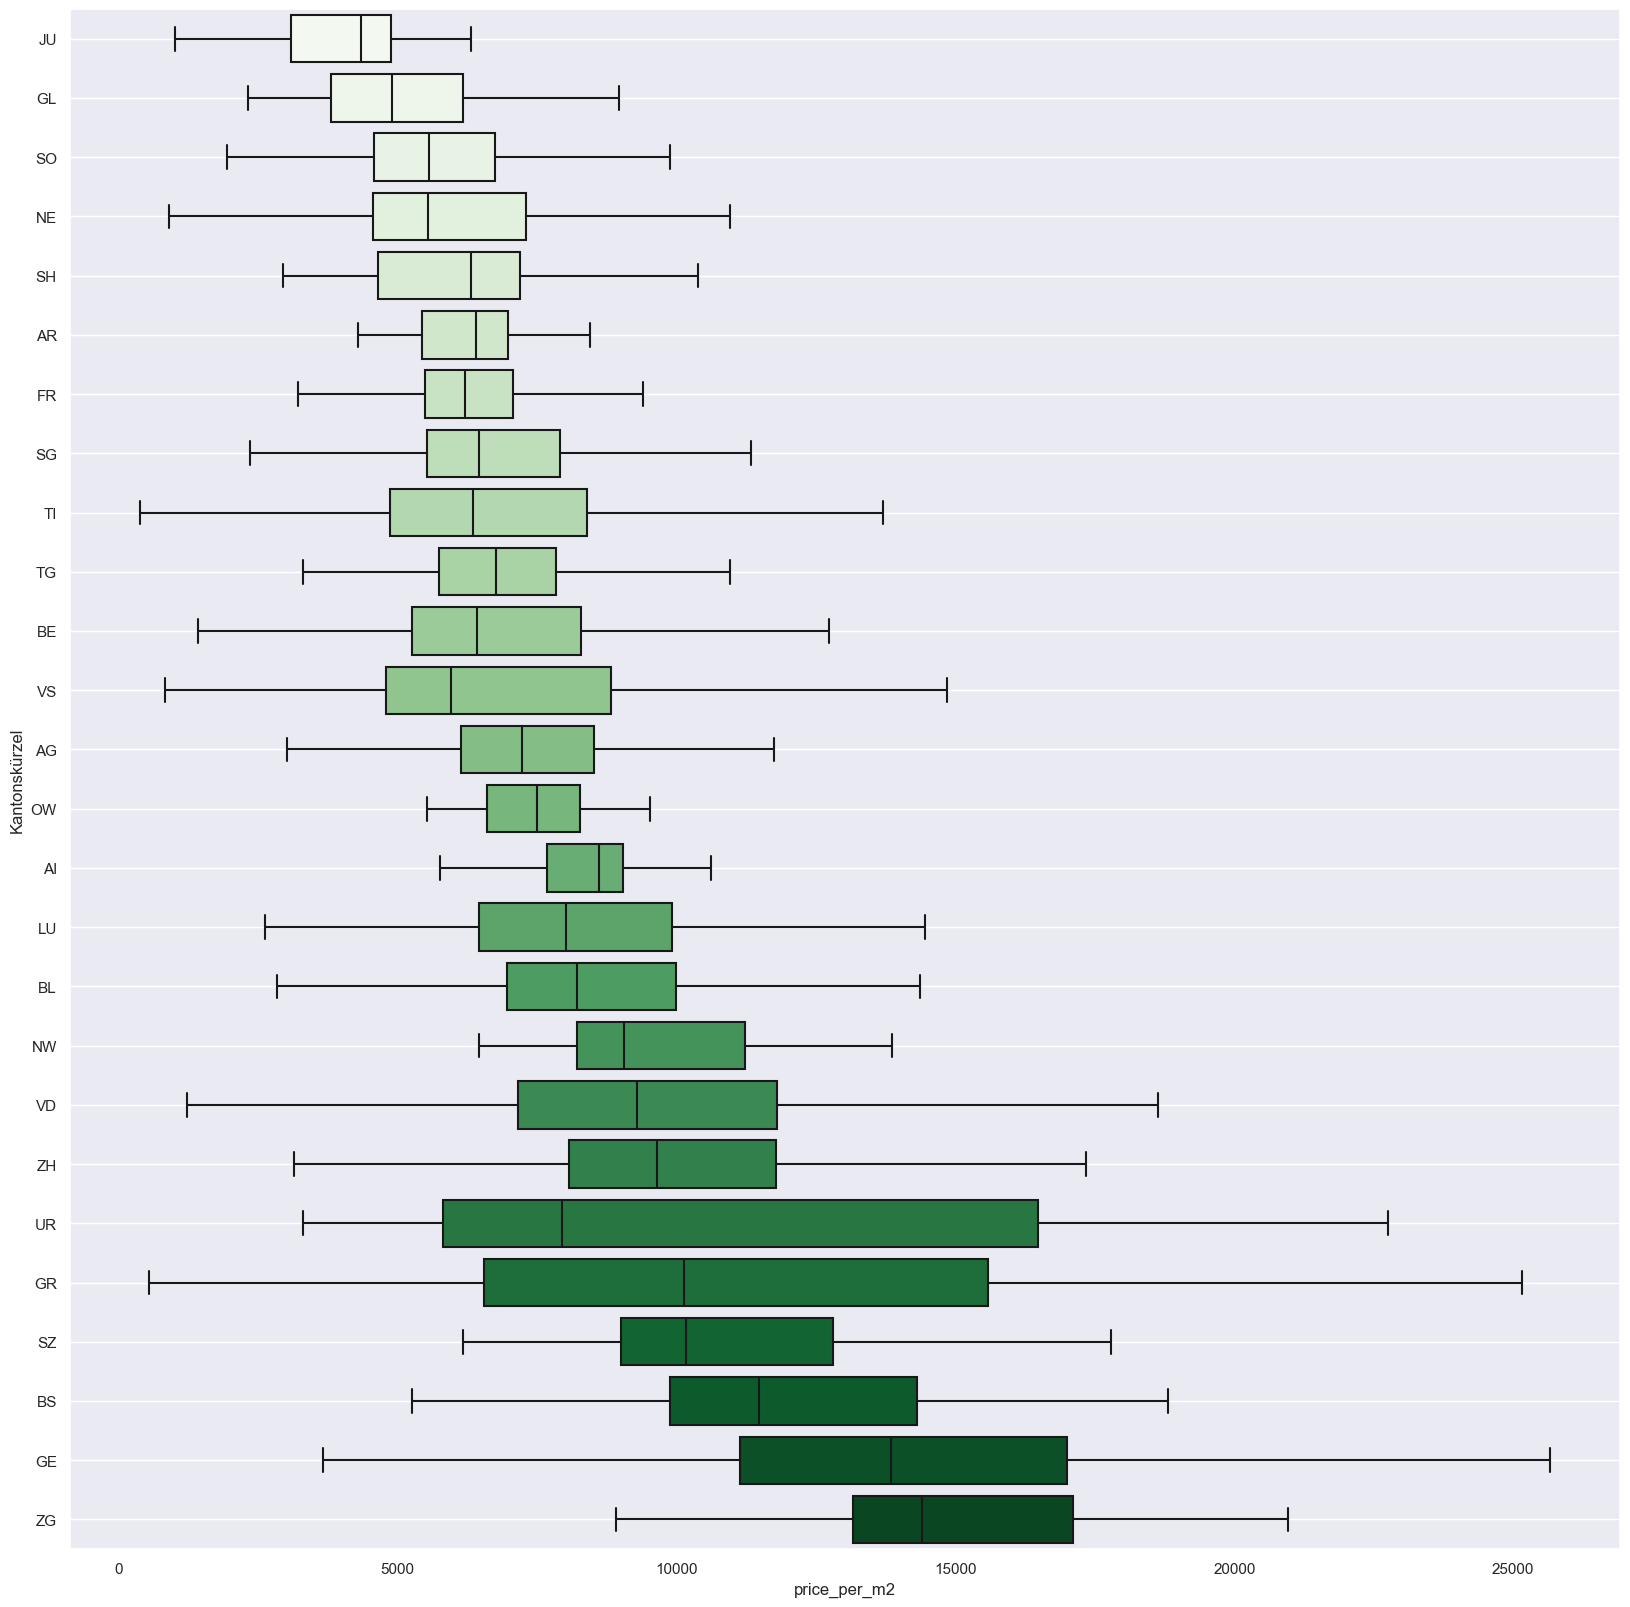

In [5]:
df_sorted = df_raw_data.groupby('Kantonskürzel').agg('mean')

df_sorted = df_sorted.sort_values(['price_per_m2']).index


# Plot boxplot with groups
plt.figure(figsize=(20,20))
sns.set(style="darkgrid")
ax = sns.boxplot(x="price_per_m2",
                 y="Kantonskürzel",
                 palette="Greens",
                 data=df_raw_data,
                 order=df_sorted,
                 orient='h',showfliers=False)
plt.grid()
plt.show()

##### 4.2 Boxplot for price_per_m2 with Outliers

C:\Users\maxwo\AppData\Local\Temp\ipykernel_12672\1506021586.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sorted = df_raw_data.groupby('Kantonskürzel').agg('mean')


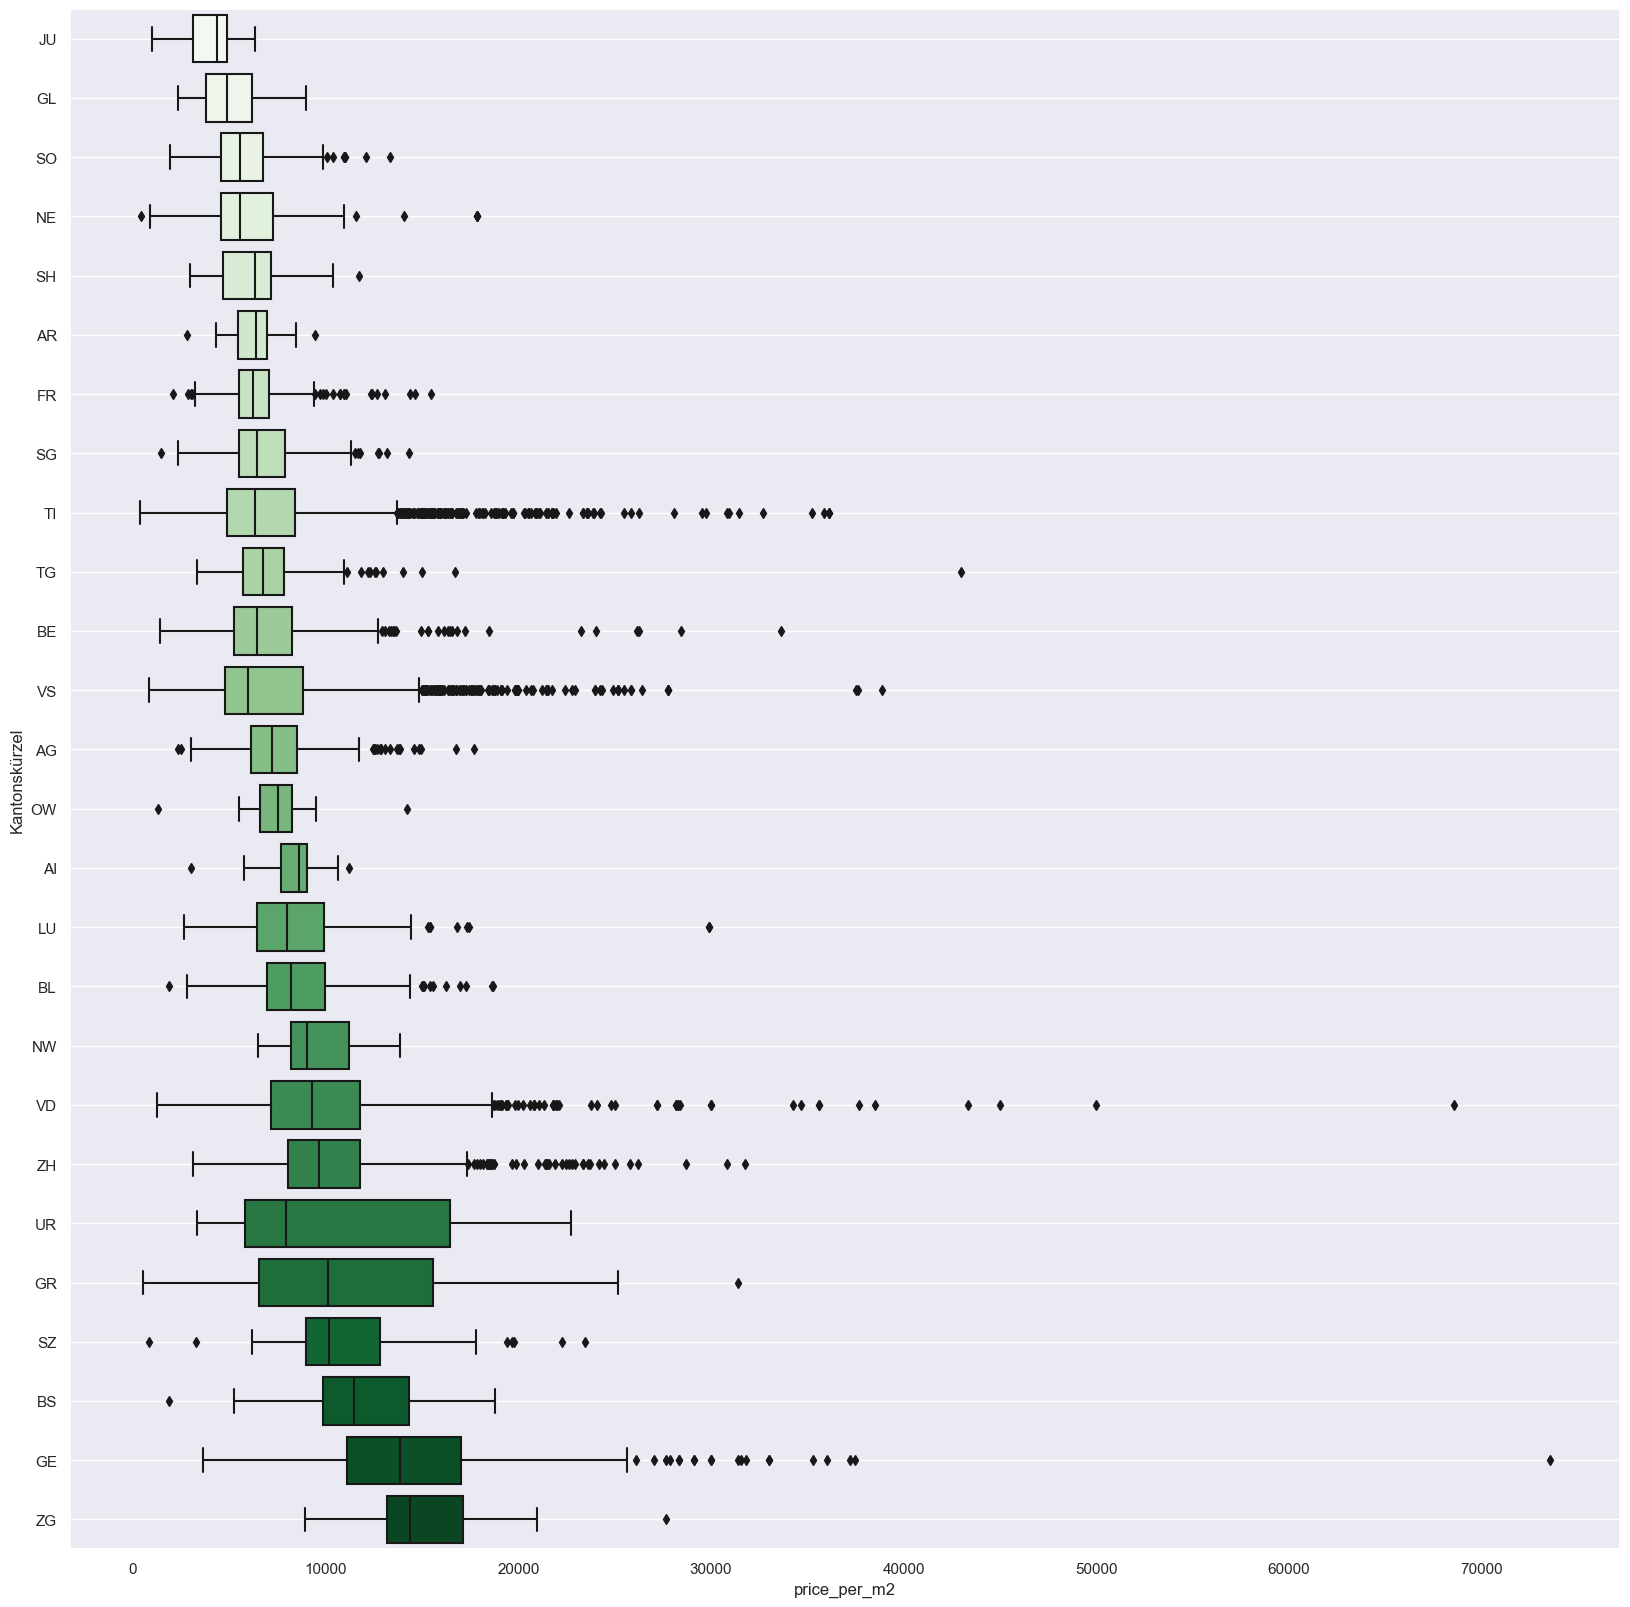

In [6]:
df_sorted = df_raw_data.groupby('Kantonskürzel').agg('mean')

df_sorted = df_sorted.sort_values(['price_per_m2']).index


# Plot boxplot with groups
plt.figure(figsize=(20,20))
sns.set(style="darkgrid")
ax = sns.boxplot(x="price_per_m2",
                 y="Kantonskürzel",
                 palette="Greens",
                 data=df_raw_data,
                 order=df_sorted,
                 orient='h')
plt.grid()
plt.show()

##### 4.3 Boxplot for the lowest priced muncipalities

In [13]:
#Create a Datafram with the Values of the 3 lowest priced cantons
df_low = pd.concat([df_raw_data.query('Kantonskürzel == "JU"'),
                     df_raw_data.query('Kantonskürzel == "GL"'),
                     df_raw_data.query('Kantonskürzel == "SO"')])

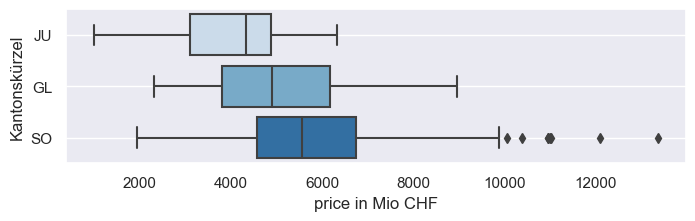

In [8]:
# Plot boxplot with groups
plt.figure(figsize=(8,2))
sns.set(style="darkgrid")
ax = sns.boxplot(x="price_per_m2",
                 y="Kantonskürzel",
                 palette="Blues",
                 data=df_low,
                 orient='h').set(xlabel="price in Mio CHF")
plt.grid()
plt.show()

##### 4.4 Boxplot for the highest priced muncipalities

In [9]:
df_high = pd.concat([df_raw_data.query('Kantonskürzel == "ZG"'),
                     df_raw_data.query('Kantonskürzel == "BS"'),
                     df_raw_data.query('Kantonskürzel == "GE"')])

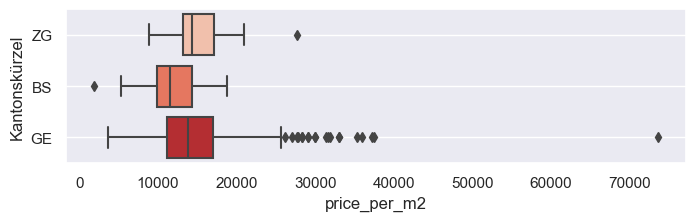

In [10]:
# Plot boxplot with groups
plt.figure(figsize=(8,2))
ax = sns.boxplot(x="price_per_m2",
                 y="Kantonskürzel",
                 palette="Reds",
                 data=df_high,
                 orient='h')
plt.grid()
plt.show()

### 5. Anova

H1: The mean price differs between different municipalities. <br>
H0: The mean price per m2 does not differ between the different municipalities. 


In the following Analysis of Variance, we calculate if there is a significant difference in the mean of the different subsets for the municipalities <br>-Zug<br>-Geneve<br>-Basel<br>-Jura<br>-Glarus<br>-Solothurn

##### 5.1 Pivot for the chosen municipalities

In [11]:
#Create a pivot table based on the concatenated Dataframes "df_largest" and "df_smallest"
table = pd.pivot_table(pd.concat([df_largest,df_smallest]), 
                       values='price_per_m2',
                       columns=['Kantonskürzel'])
print(table)

Kantonskürzel            BS            GE           GL           JU  \
price_per_m2   11893.986988  14692.810912  5104.480714  4027.854051   

Kantonskürzel           SO          ZG  
price_per_m2   5858.977946  15235.4275  


#### 5.2 Anova for Kantonskürzel & price_per_m2

In [12]:
# Create subsets (groups)
zg = df_raw_data.loc[df_raw_data['Kantonskürzel'] == 'ZG']
ge = df_raw_data.loc[df_raw_data['Kantonskürzel'] == 'GE']
bs = df_raw_data.loc[df_raw_data['Kantonskürzel'] == 'BS']
ju = df_raw_data.loc[df_raw_data['Kantonskürzel'] == 'JU']
gl = df_raw_data.loc[df_raw_data['Kantonskürzel'] == 'GL']
so = df_raw_data.loc[df_raw_data['Kantonskürzel'] == 'SO']

# Create ANOVA
fvalue, pvalue = stats.f_oneway(zg['price_per_m2'],
                                ge['price_per_m2'],
                                bs['price_per_m2'],
                                ju['price_per_m2'],
                                gl['price_per_m2'],
                                so['price_per_m2'])

# Print results
print('F-value:', fvalue.round(3), 'p-value', pvalue.round(200))

F-value: 285.484 p-value 1.6299999999999994e-198


#### 5.3 Interpretation of the result of the statistical test

If we chose a significance level of α=0.05, we can reject the null hypotheses and confirm, that there is a significant difference in the mean of price per m2 between the different municipalities.

This analysis however does not provide further information in how this difference in mean is explainable, it does however lay a foundation for further statistical tests.